In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [32]:
## stage 1 Data Understanding 
## load and read the dataset
df = pd.read_csv('first inten project.csv')

In [33]:
df.head(5)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [34]:
df.tail(5)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
36284,INN36286,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [35]:
df.shape

(36285, 17)

In [36]:
## check types for data
df.dtypes

Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object

In [37]:
## some basic statistical info about the dataset
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [38]:
## check for number of unique values in every column , if < 10 then its categorical.
for column in df.columns:
    if (df[column].nunique()) <= 10:
        print(f"Column: {column}")
        print(df[column].value_counts())
        print("\n")
    

Column: number of adults
number of adults
2    26110
1     7702
3     2318
0      139
4       16
Name: count, dtype: int64


Column: number of children
number of children
0     33583
1      1622
2      1058
3        19
9         2
10        1
Name: count, dtype: int64


Column: number of weekend nights
number of weekend nights
0    16876
1    10000
2     9072
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64


Column: type of meal
type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64


Column: car parking space
car parking space
0    35161
1     1124
Name: count, dtype: int64


Column: room type
room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64


Column: market segment type
market segment type
Online           23221
Offline          10531
Corporate     

In [39]:
## Stage 1 is finished

In [40]:
## Stage 2 : data cleaning
## check for duplicates
df.duplicated().sum()

0

In [41]:
## check for null values
df.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

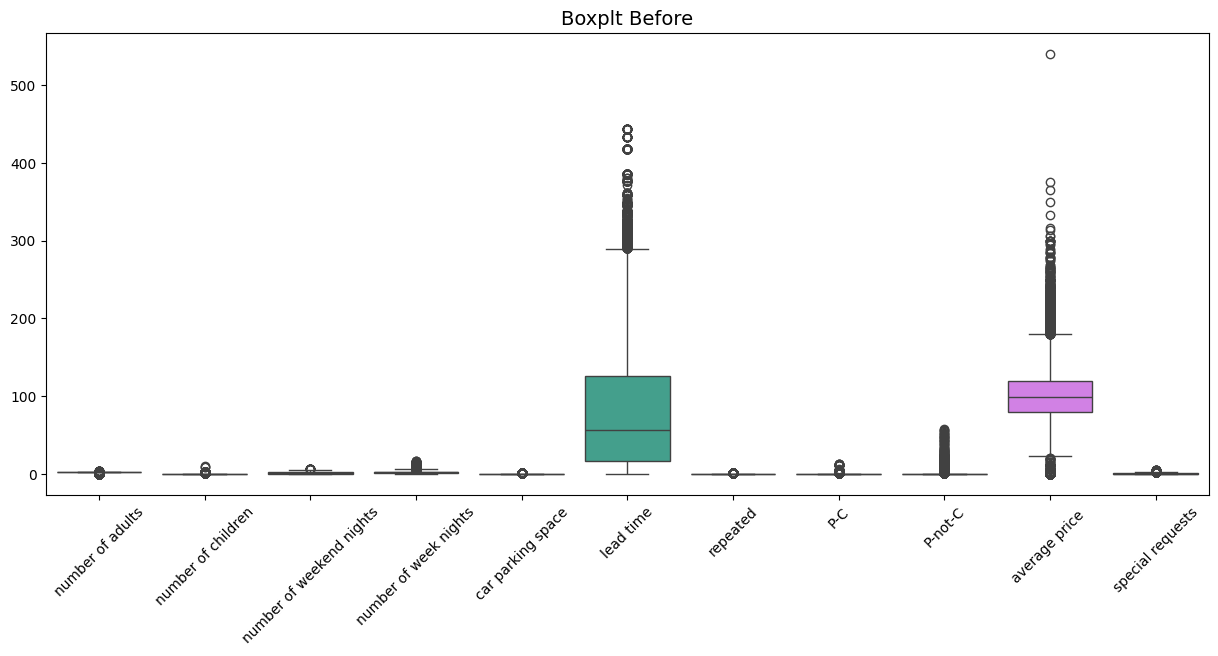

In [42]:
# plot outliers before treating 
plt.figure(figsize=(15, 6))  # Wider figure to fit all columns
sns.boxplot(data=df)
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.title("Boxplt Before", fontsize=14)
plt.show()



In [43]:
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')  # Invalid dates become NaT

df['year'] = df['date of reservation'].dt.year
df['month'] = df['date of reservation'].dt.month
df['day'] = df['date of reservation'].dt.day

time_cols = ['year'] 
col = ['date of reservation']
# Check for missing values in categorical columns
print(df[time_cols].isnull().sum())
df.dropna(subset=time_cols, inplace=True)
df = df.drop(columns=['date of reservation'])


df['year'] = df['year'].astype('int64')
df['month'] = df['month'].astype('int64')
df['day'] = df['day'].astype('int64')

year    37
dtype: int64


In [44]:
## get copy of the dataset to avoid any problems on the real dataset
df_copy = df.copy()

In [45]:
## loop through all columns, check if its a number, then calculate IQR
for col in df_copy.columns:
    if df_copy[col].dtype in ['int64', 'float64']:  # Check if the column is numeric
        # Calculate Q1, Q3, and IQR
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate the mode
        mode_value = df_copy[col].mode()

        # Replace outliers with the mode
        df_copy[col] = np.where((df_copy[col] < lower_bound) | (df_copy[col] > upper_bound), mode_value, df_copy[col])


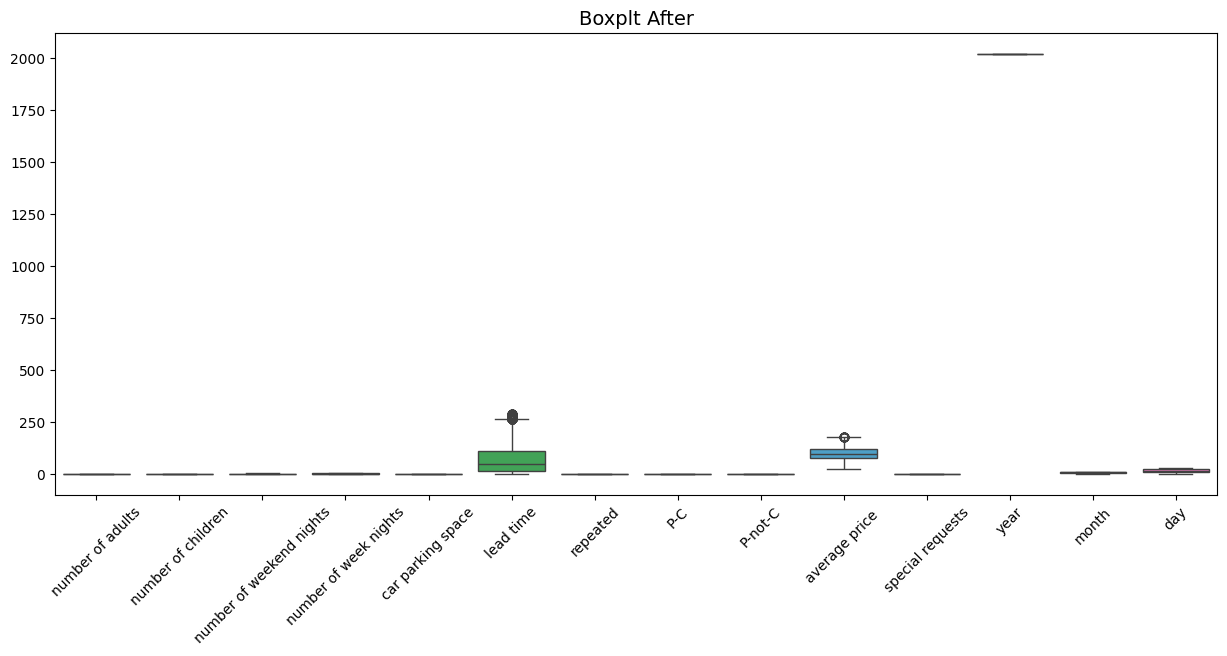

In [46]:
# plot outliers After 
plt.figure(figsize=(15, 6))  # Wider figure to fit all columns
sns.boxplot(data=df_copy)
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.title("Boxplt After", fontsize=14)
plt.show()


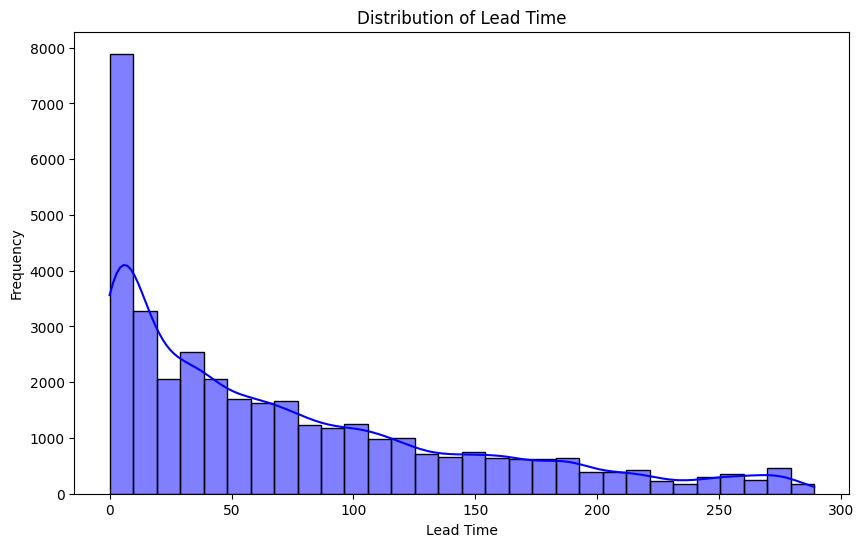

In [47]:
## Stage 3 Explaroty Data Analysis
plt.figure(figsize=(10, 6))

# Histogram with KDE
sns.histplot(df_copy['lead time'], bins=30, kde=True, color='blue')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()



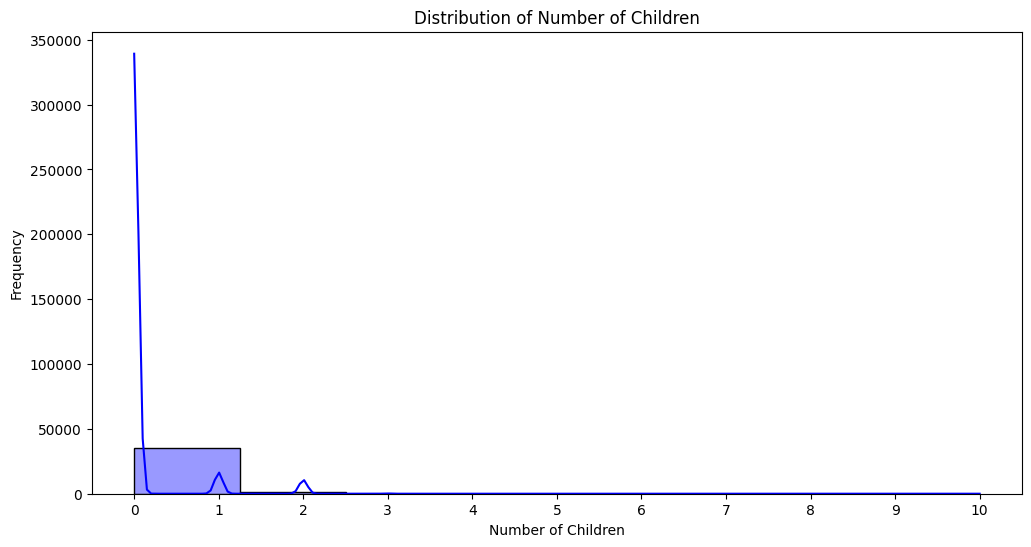

In [48]:
# Create the plot
plt.figure(figsize=(12, 6))
sns.histplot(df['number of children'], bins=8, kde=True, color='blue', alpha=0.4)

# Labels and title
plt.title('Distribution of Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')  # Keep frequency as the y-axis
plt.xticks(range(11))  # Ensure x-axis labels are 0 to 10

# Show the plot
plt.show()

In [49]:
df_copy.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'booking status', 'year', 'month', 'day'],
      dtype='object')

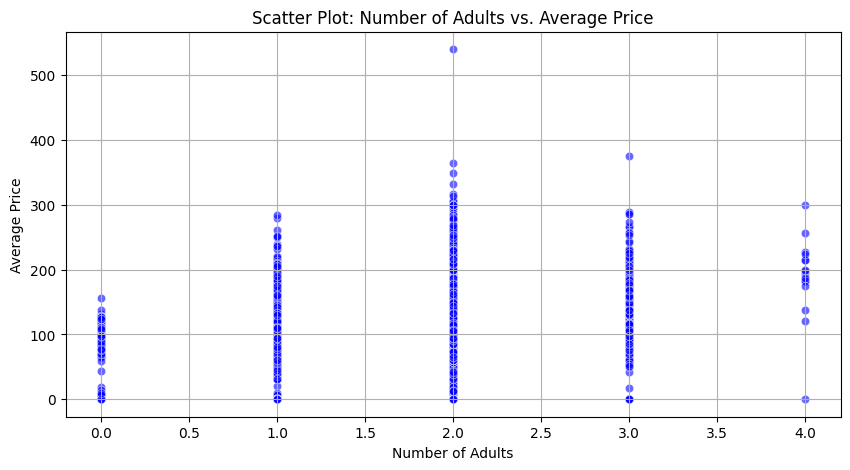

In [23]:


plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['number of adults'], y=df['average price '], alpha=0.6, color='blue')

# Titles and labels
plt.title('Scatter Plot: Number of Adults vs. Average Price')
plt.xlabel('Number of Adults')
plt.ylabel('Average Price')
plt.grid(True)

plt.show()


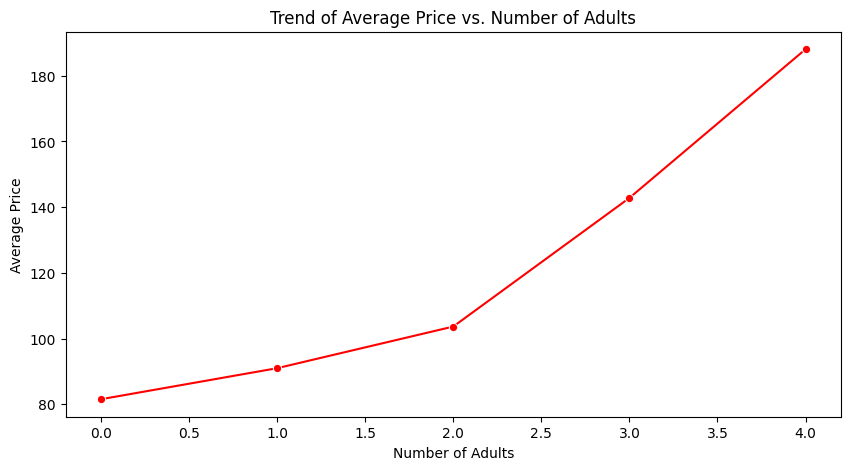

In [24]:
df_grouped = df.groupby('number of adults')['average price '].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_grouped['number of adults'], y=df_grouped['average price '], marker='o', color='red')

# Titles and labels
plt.title('Trend of Average Price vs. Number of Adults')
plt.xlabel('Number of Adults')
plt.ylabel('Average Price')

plt.show()


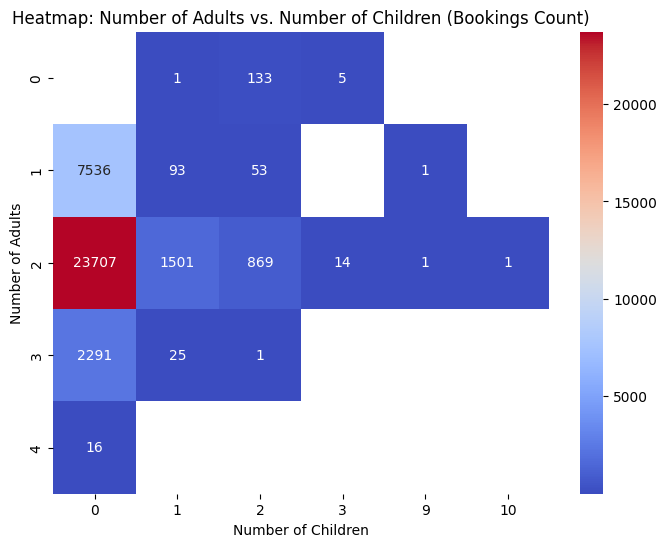

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.pivot_table(index='number of adults', columns='number of children', values='Booking_ID', aggfunc='count'), cmap='coolwarm', annot=True, fmt=".0f")

plt.title('Heatmap: Number of Adults vs. Number of Children (Bookings Count)')
plt.xlabel('Number of Children')
plt.ylabel('Number of Adults')

plt.show()

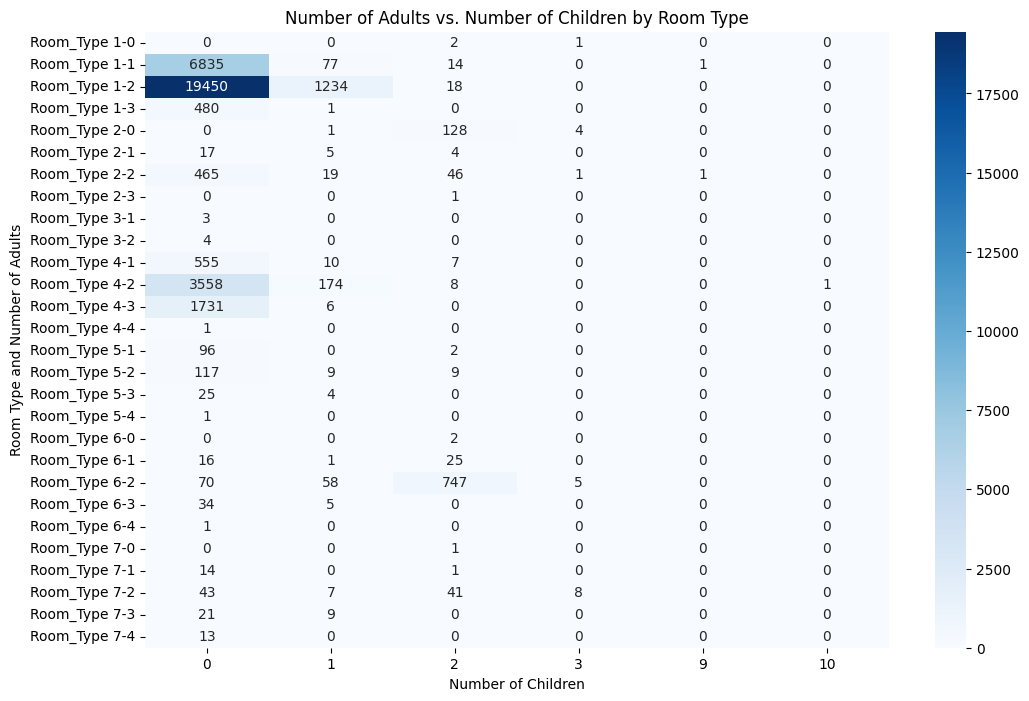

In [50]:
cross_tab = pd.crosstab(index=[df['room type'], df['number of adults']], columns=df['number of children'])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Number of Adults vs. Number of Children by Room Type')
plt.xlabel('Number of Children')
plt.ylabel('Room Type and Number of Adults')
plt.show()


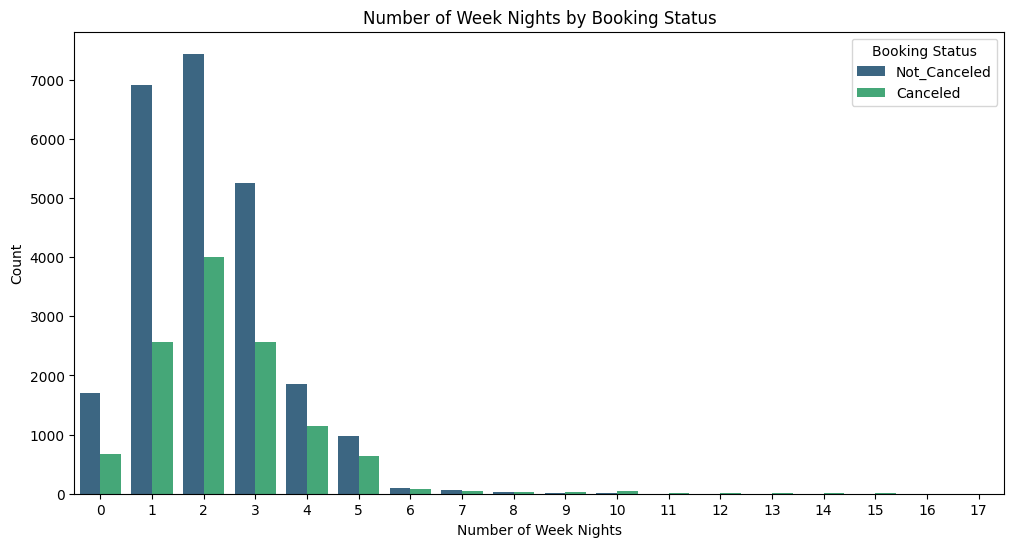

In [51]:
plt.figure(figsize=(12, 6))
sns.countplot(x='number of week nights', hue='booking status', data=df, palette='viridis')
plt.title('Number of Week Nights by Booking Status')
plt.xlabel('Number of Week Nights')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.show()

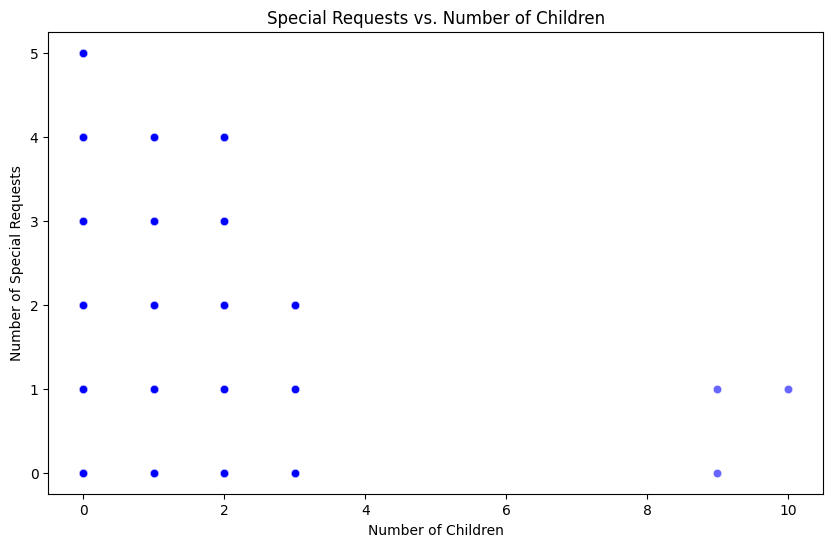

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number of children', y='special requests', data=df, alpha=0.6, color='blue')
plt.title('Special Requests vs. Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Number of Special Requests')
plt.show()

C:\Users\Win 10\AppData\Local\Temp\ipykernel_14428\1432779251.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='number of children', y='special requests', data=avg_special_requests, palette='viridis')


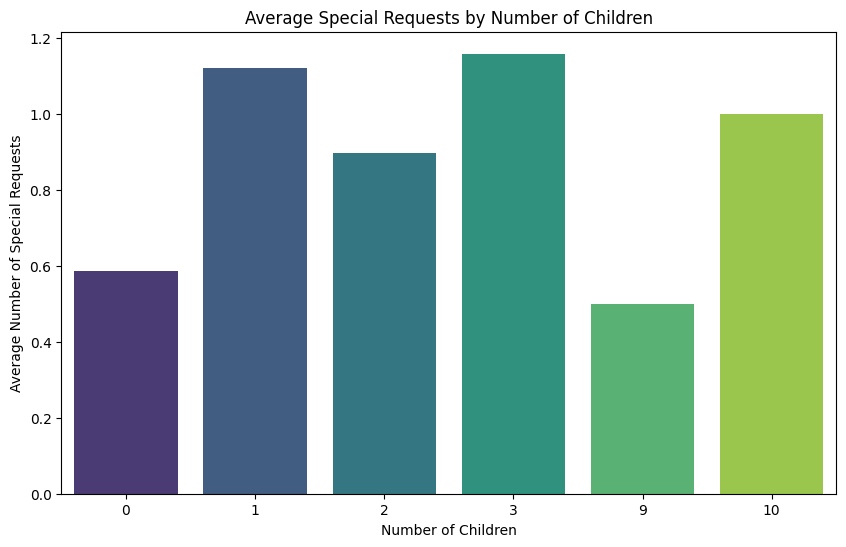

In [53]:
avg_special_requests = df.groupby('number of children')['special requests'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='number of children', y='special requests', data=avg_special_requests, palette='viridis')
plt.title('Average Special Requests by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Number of Special Requests')
plt.show()

In [54]:
df_copy['date of reservation'] = pd.to_datetime(df_copy['date of reservation'], errors='coerce')  # Invalid dates become NaT


# Extract month from the date
df_copy['month'] = df_copy['date of reservation'].dt.month

KeyError: 'date of reservation'

C:\Users\Win 10\AppData\Local\Temp\ipykernel_14428\2556173998.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='booking status', data=df_copy, palette='viridis')


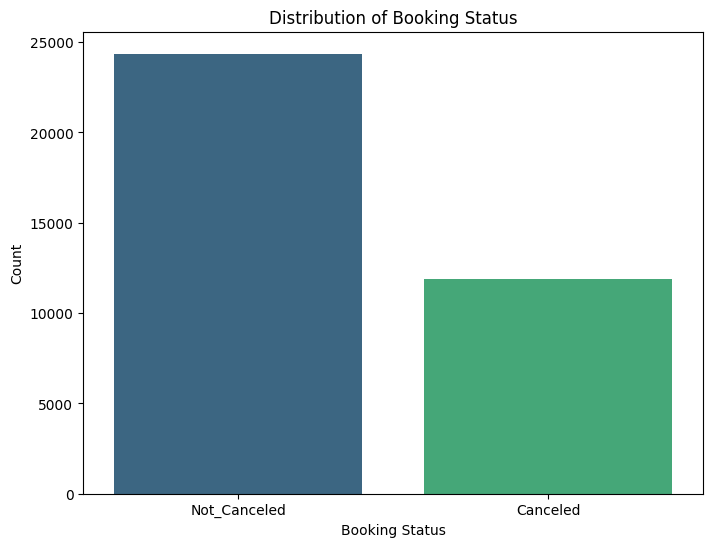

In [55]:


# Bar chart of booking status
plt.figure(figsize=(8, 6))
sns.countplot(x='booking status', data=df_copy, palette='viridis')
plt.title('Distribution of Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.show()

C:\Users\Win 10\AppData\Local\Temp\ipykernel_14428\1267917948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=df_copy, palette='viridis')


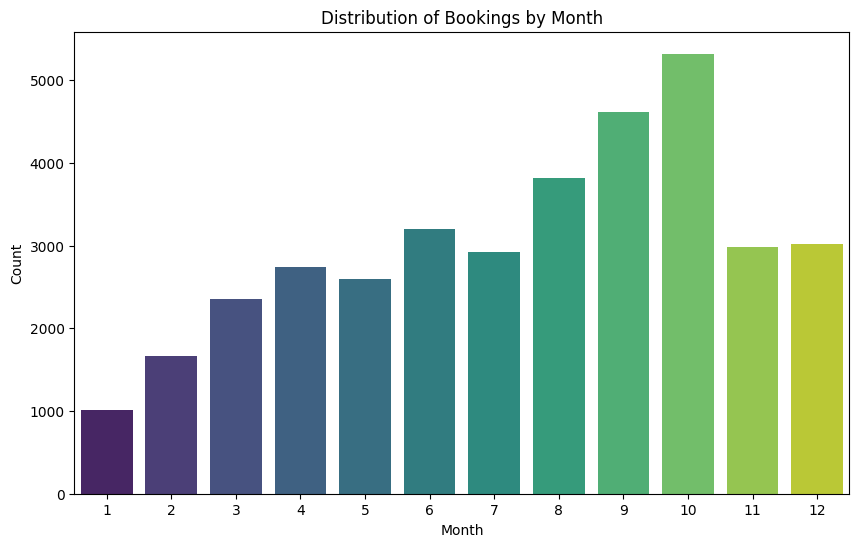

In [56]:
# Bar chart of months
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df_copy, palette='viridis')
plt.title('Distribution of Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

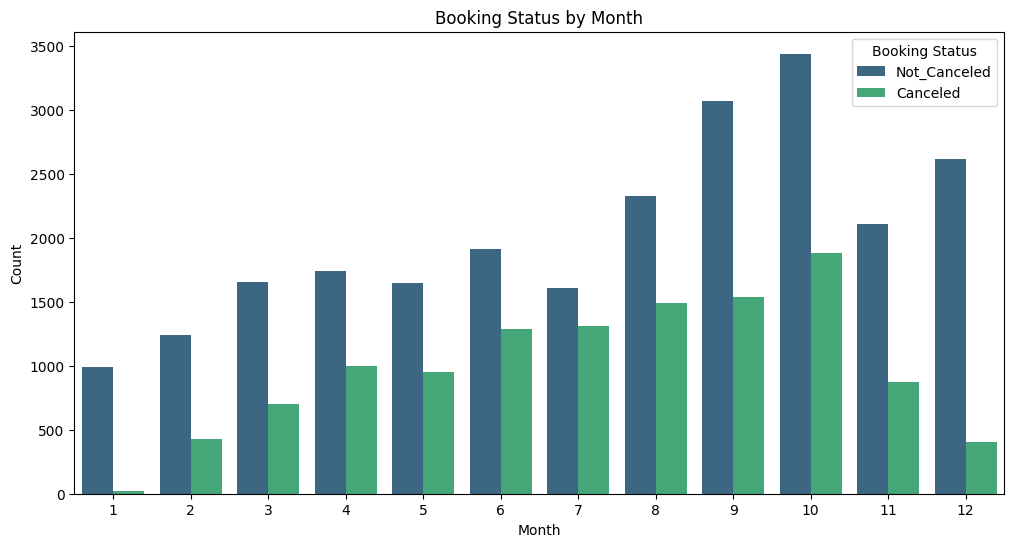

In [57]:
plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='booking status', data=df_copy, palette='viridis')
plt.title('Booking Status by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.show()

C:\Users\Win 10\AppData\Local\Temp\ipykernel_14428\2242004335.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='booking status', data=cancellation_rate, palette='viridis')


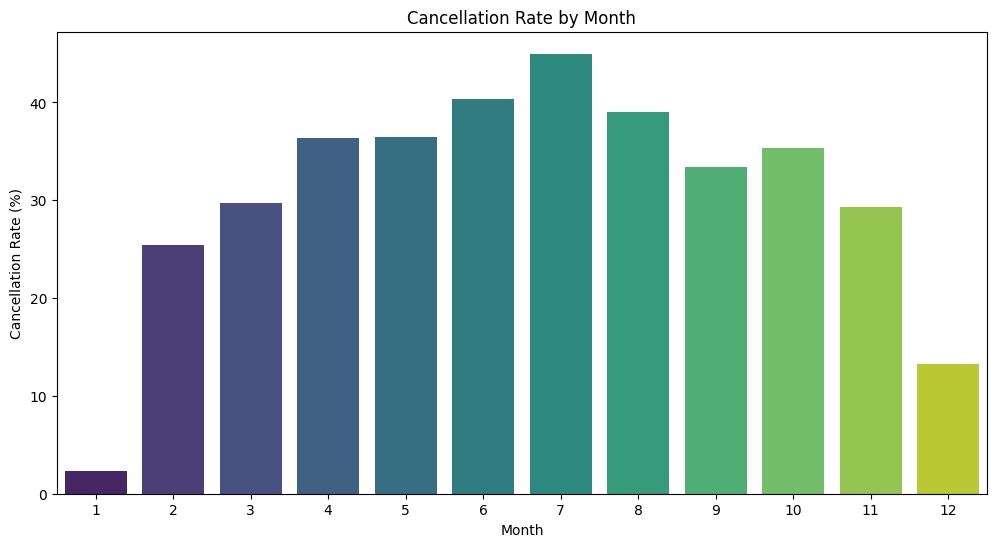

In [58]:
cancellation_rate = df_copy.groupby('month')['booking status'].apply(lambda x: (x == 'Canceled').mean() * 100).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='booking status', data=cancellation_rate, palette='viridis')
plt.title('Cancellation Rate by Month')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate (%)')
plt.show()

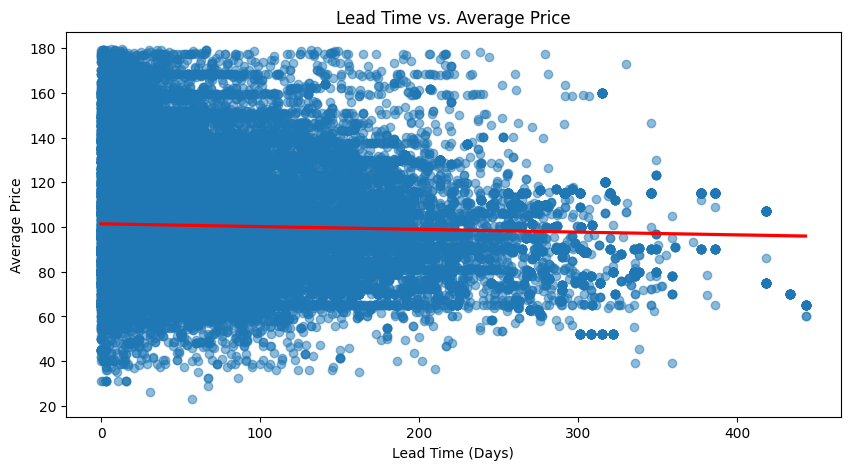

In [59]:

plt.figure(figsize=(10, 5))
sns.regplot(x=df['lead time'], y=df_copy['average price '], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

plt.title('Lead Time vs. Average Price')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Average Price')

plt.show()


In [60]:
correlation_matrix = np.corrcoef(df_copy['lead time'], df_copy['average price '])
r_value = correlation_matrix[0, 1]

print(f"Correlation Coefficient (r): {r_value:.4f}")

Correlation Coefficient (r): -0.0104


In [61]:
## machine learning ## task 2 

In [62]:
df = df_copy

In [63]:
## Label encoding 1 for cancelled and 0 for not cancelled
encoder = LabelEncoder()
df['booking status'] = encoder.fit_transform(df['booking status']) 

In [64]:
df['total_days'] = df['number of weekend nights'] + df['number of week nights']
df['total_people'] = df['number of children'] + df['number of adults']
df = df.drop(columns=['number of weekend nights', 'number of week nights', 'number of children', 'number of adults', 'Booking_ID'])

In [65]:
## one hot encoding
categorical_cols = ['type of meal', 'car parking space','market segment type','room type']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True).astype('int64')

In [66]:
from sklearn.preprocessing import MinMaxScaler

# List of numerical columns
numerical_columns = ['total_people', 'total_days', 'average price ', 'lead time', 'special requests', 'P-C', 'P-not-C', 'year', 'month', 'day']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [67]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# Features (X) and target (y)
X = df.drop('booking status', axis=1)
y = df['booking status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(max_iter=1000)


log_reg.fit(X_train_res, y_train_res)


y_pred_log_reg = log_reg.predict(X_test)


print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.7096551724137931


In [69]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_log_reg)

print("F1-score:", f1)


F1-score: 0.7691632854479657


In [70]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=1)  # You can tune the number of neighbors


knn.fit(X_train_res, y_train_res)


y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.8361379310344828


In [ ]:
error_rates = []
k_values = list(range(1, 30))  


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_res, y_train_res)
    y_pred = knn.predict(X_test)
    error_rates.append(1 - accuracy_score(y_test, y_pred))

# Plot the error rates
plt.plot(k_values, error_rates, marker='o')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.title('k vs. Error Rate')
plt.show()

# Find the optimal k (elbow point)
optimal_k = k_values[error_rates.index(min(error_rates))]
print("Optimal k:", optimal_k)

In [72]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_knn)


print("F1-score:", f1)


F1-score: 0.8771712158808933
